# RNetwork Visualization - Maze

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import torch
import numpy as np

from tqdm import tqdm
from omegaconf import OmegaConf

import envs
import utils

from rnet.model import RNetModel
from rnet.memory import RNetMemory
from rnet.utils import load

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Config Utils

In [4]:
cfg_path = f"../conf/config.yaml"

env_name = 'maze_U4rooms'

cfg = OmegaConf.load(cfg_path)
env_cfg = OmegaConf.load(f'../conf/env/{env_name}.yaml')
cfg = OmegaConf.merge(cfg, env_cfg)


space_info = utils.get_space_info(cfg.env.obs, cfg.env.action_dim)
device = torch.device("cuda:0")

In [5]:
env = envs.make_env(cfg.env, space_info)

points = env.generate_points(30, random=False)

## Load

In [6]:
model = RNetModel(cfg.rnet.model, space_info)

In [7]:
memory = RNetMemory(cfg.rnet.memory, space_info, model.feat_size, device)

In [14]:
#exp_name = '20220506-123846_maze_U4rooms_rs0.1-lr0.0006-bs2048-updates1000-alpha0.08-gamma0.95-graph-reward-rnet-asym'
#save_dir = os.path.join('/checkpoint/linamezghani/offline-gcrl/logs/', exp_name)

save_dir = '/checkpoint/linamezghani/offline-gcrl/logs/20220530-051512_maze_U4rooms_rs0.01-lr0.001-bs1024-updates1000-alpha0.01-gamma0.99-graph_sig-reward-temp-1.0-subgoalFalse-asym-fix-seed_cudnn_s234_r0/'

memory, model = load(save_dir, memory, model)

Loading rnet objects from  /checkpoint/linamezghani/offline-gcrl/logs/20220530-051512_maze_U4rooms_rs0.01-lr0.001-bs1024-updates1000-alpha0.01-gamma0.99-graph_sig-reward-temp-1.0-subgoalFalse-asym-fix-seed_cudnn_s234_r0/


In [15]:
print(memory.nn_out)

[[  0   0   0 ...   6   6   6]
 [117 117 117 ... 143 143 143]
 [ 10  10 156 ... 176 176 176]
 ...
 [ 31  31  31 ... 122 122 122]
 [111 111 111 ...  70 129  11]
 [  6   6   6 ... 164 164 164]]


## Visualize

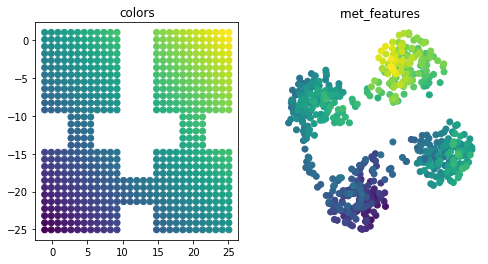

In [16]:
model.eval()
model.to("cpu")
fig = env.plot_embeddings(model, points['state'][:, :], points['state'][:, :],
                          show_colors=True)

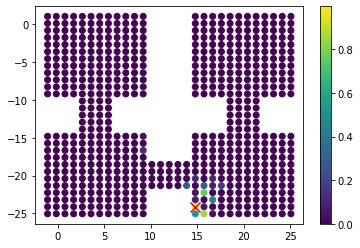

In [17]:
i = np.random.randint(0, points['state'][:, :3].shape[0])
fig = env.plot_values(model, points['state'][:, :3][i], points['state'][:, :3][i], points['state'][:, :3],
                      points['state'][:, :3], sigmoid=True)

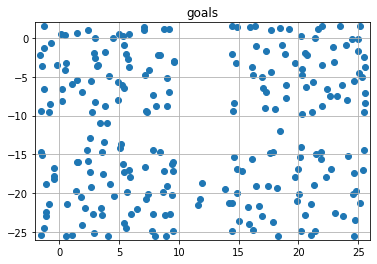

In [18]:
env.set_goals(memory.get_goals())
fig = env.plot_goals()

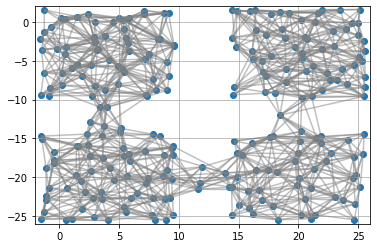

In [19]:
fig = env.plot_graph(memory)

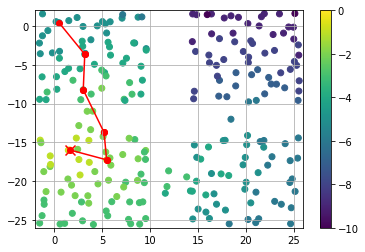

In [20]:
fig = env.plot_graph_dist(memory)

In [31]:
list(memory.edge2rb.keys())[:10]

[(89, 141),
 (141, 89),
 (83, 112),
 (112, 83),
 (143, 27),
 (27, 143),
 (180, 223),
 (223, 180),
 (157, 42),
 (42, 157)]

In [32]:
memory.edge2rb[89, 141]

[(0, 420),
 (244, 656),
 (254, 102),
 (383, 176),
 (669, 764),
 (669, 769),
 (1192, 25),
 (2170, 256),
 (2396, 165),
 (2415, 94),
 (3122, 428),
 (3161, 951),
 (3528, 227),
 (3537, 914),
 (3555, 180),
 (4302, 200),
 (4391, 349),
 (4403, 163),
 (4670, 98),
 (4718, 774),
 (4868, 465),
 (5187, 726),
 (5512, 203),
 (5984, 858),
 (7758, 542),
 (9502, 37),
 (9668, 589),
 (9773, 316),
 (9899, 371)]